# コース別最強レーサーを考える

In [135]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# グラフに日本語フォントを使用
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# my moduleを追加
current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '../../data_preparing/'))
import loader

In [78]:
# データロード
race_result_df = loader.make_race_result_df()
# 中身を確認
pd.set_option('display.max_columns', 500)
race_result_df.head

/Users/grice/mywork/boatrace/src/analyze/WhoIsTheStrongestRacer/../../data_preparing/loader.py:367: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  race_results_supplementary_df = pd.concat(race_results_supplementary_df_list)


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
48256    False
48257    False
48258    False
48259    False
48260    False
48261    False
48262    False
48263    False
48264    False
48265    False
48266    False
48267    False
48268    False
48269    False
48270    False
48271    False
48272    False
48273    False
48274    False
48275    False
48276    False
48277    False
48278    False
48279    False
48280    False
48281    False
48282    False
48283    False
48284    False
48285    False
Name: racerName_1, Length: 48286, dtype: bool


<bound method NDFrame.head of             date venue  raceNumber weather windDir  windPow  waveHight ruler  \
0     2019-11-25   唐　津           1       晴      北東        5          5   逃げ　   
1     2019-11-25   唐　津           2       曇      北東        5          5   差し　   
2     2019-11-25   唐　津           3       晴      北東        4          4   差し　   
3     2019-11-25   唐　津           4       曇      北東        4          4   まくり   
4     2019-11-25   唐　津           5       曇      北東        4          4   差し　   
5     2019-11-25   唐　津           6       曇      北東        4          4   逃げ　   
6     2019-11-25   唐　津           7       曇      北　        4          4   逃げ　   
7     2019-11-25   唐　津           8       曇      北　        4          4   差し　   
8     2019-11-25   唐　津           9       曇      北東        4          4   差し　   
9     2019-11-25   唐　津          10       曇      北　        4          4   まくり   
10    2019-11-25   唐　津          11       曇      北　        5          5   逃げ　   
11    2019

In [147]:
"""
データ準備
- 1号艇のレーサーidで集計を行い、1号艇での出走回数および１位から6位までの入賞回数を算出
- これらをレーサー名をindexとしたデータフレームにまとめる
- 出走回数が20回を超える選手を対象とした
"""

pd.set_option('display.max_rows', 10000)

# 1号艇での出走回数と平均着順
racer_cnt_df_1 = race_result_df.groupby("racerName_1").rank_1.agg(["count", "mean"])
# 1号艇出走時の各着順の回数
racer_cnt_df_2 = race_result_df.groupby("racerName_1").rank_1.agg(["value_counts"])

# 1号艇での出走回数が　20回に満たない選手はdrop
drop_racer_list = list(racer_cnt_df_1.query("count < 20").index.values)
racer_cnt_df_1.drop(index=drop_racer_list, inplace=True)
racer_cnt_df_2.drop(index=drop_racer_list, inplace=True)

# このままだと使いづらいので、1着だった回数、二着....を横方向に並べる
racer_cnt_df_3 = racer_cnt_df_1

for i in range(1, 7):
    # i着の回数を追記し、カラム名を変更
    racer_cnt_df_3 = racer_cnt_df_3.join(racer_cnt_df_2.xs([i],level=[1]))
    racer_cnt_df_3.rename(columns = {'value_counts':'count_rank_{0}'.format(i)}, inplace=True)
    
    # i着になる率のカラムを作成
    racer_cnt_df_3["ratio_rank_{0}".format(i)] = (racer_cnt_df_3["count_rank_{0}".format(i)] / racer_cnt_df_3["count"])

# i着がゼロ回だったときNaNになるのでゼロで置換
racer_cnt_df_3.fillna(0, inplace=True)

print(racer_cnt_df_2)

                    value_counts
racerName_1 rank_1              
一　宮　　稔　弘    1                 43
            2                  4
            3                  4
            4                  1
一　柳　　和　孝    1                 11
            2                  4
            4                  3
            5                  3
            6                  3
            3                  2
一　瀬　　　　明    1                 37
            2                 17
            4                  4
            3                  2
            5                  2
一　色　　雅　昭    2                  8
            3                  5
            1                  4
            4                  3
            6                  2
三　原　　　　司    1                 12
            2                  6
            4                  4
            3                  3
            5                  1
三　品　　隆　浩    1                  5
            2                  5
            4                  5
          

## 解析:  1号艇で1着になる率の分布

/Users/grice/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


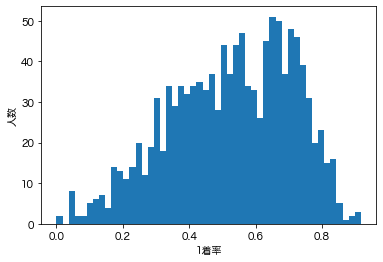

In [137]:
# 1号艇が1着になる率の分布
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(racer_cnt_df_3["ratio_rank_1"], bins=50)
ax.set_xlabel('1着率')
ax.set_ylabel('人数')
fig.show()
# 1着率がもっとも高い選手とその率
# 1着率がもっとも低い選手とその率
# 平均（これはヒストグラムで出すか）

plt.savefig('histgram_frame_1_win_ratio')

In [142]:
racer_cnt_df_3.ratio_rank_1.agg(["idxmax", "max", "idxmin", "min", "mean", "std"])

idxmax    大　池　　佑　来
max       0.916667
idxmin    橋谷田　　佳　織
min              0
mean       0.52575
std       0.185019
Name: ratio_rank_1, dtype: object

In [154]:
racer_cnt_df_3["rank_ratio_rank_1"] = racer_cnt_df_3.ratio_rank_1.rank(ascending=False)
print(racer_cnt_df_3[["ratio_rank_1", "rank_ratio_rank_1"]])

racer_cnt_df_3.to_csv("racer_cnt_df_3.csv")

             ratio_rank_1  rank_ratio_rank_1
racerName_1                                 
一　宮　　稔　弘         0.826923               27.0
一　柳　　和　孝         0.423077              826.0
一　瀬　　　　明         0.596774              472.0
一　色　　雅　昭         0.181818             1134.0
三　原　　　　司         0.461538              747.5
三　品　　隆　浩         0.238095             1094.5
三　好　　　　一         0.368421              930.0
三　好　　勇　人         0.717391              197.0
三　宅　　　　潤         0.697674              247.0
三　宅　　健　太         0.538462              597.5
三　宅　　爾　士         0.423077              826.0
三　嶌　　誠　司         0.660714              330.0
三　川　　昂　暁         0.629630              418.0
三　浦　　敬　太         0.810811               41.0
三　浦　　洋次朗         0.567568              528.5
三　浦　　裕　貴         0.208333             1116.5
三　瀬　　　　譲         0.461538              747.5
三　苫　　晃　幸         0.619048              441.5
三　角　　哲　男         0.637931              394.0
三井所　　尊　春         0.651163              361.5
上　之　　晃　弘  

## 解析2: 2-6号艇で1着をとる率の分布、2着になる率、3着になる率それぞれの分布